# Kaggle Leaf Classification Challenge


In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

import torch.nn.functional as F
from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize



In [5]:
path = 'leaf-classification/'  # if you're folder structure is as defined above and you want to run locally

In [6]:
image_paths = glob.glob(path+'images/*.jpg')
print("Total Observations:\t", len(image_paths))

# now loading the train.csv to find features for each training point
train = pd.read_csv(path + 'train.csv')
train_images = [path+'images/{}.jpg'.format(i) for i in train.id.values]

# now loading the test.csv
test = pd.read_csv(path + 'test.csv')

Total Observations:	 1584


In [7]:
# Shape and columns of the data
print("Train shape:\t", train.shape)
print("Test shape:\t", test.shape)
print("Train columns:\t", train.columns)
print("Test columns:\t", test.columns)

Train shape:	 (990, 194)
Test shape:	 (594, 193)
Train columns:	 Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)
Test columns:	 Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)


In [8]:
# Check if the columns in train and test are the same
# Find the difference
train.columns.unique().symmetric_difference(test.columns.unique())

Index(['species'], dtype='object')

species
Sorbus_Aria              10
Acer_Opalus              10
Pterocarya_Stenoptera    10
Viburnum_Tinus           10
Morus_Nigra              10
                         ..
Quercus_Canariensis      10
Quercus_Rubra            10
Quercus_Brantii          10
Salix_Fragilis           10
Zelkova_Serrata          10
Name: count, Length: 99, dtype: int64


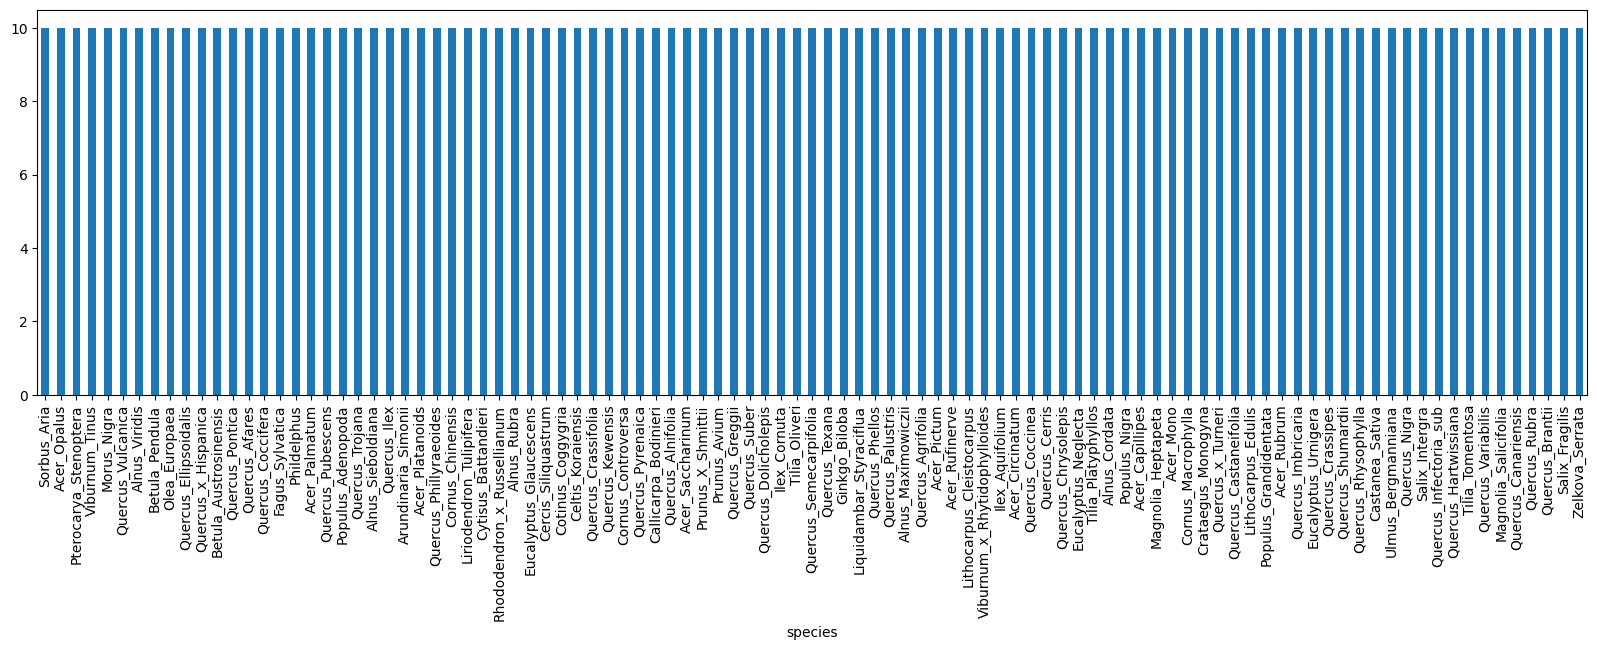

In [9]:
# How many samples of each species is in the training data
print(train.species.value_counts())
train.species.value_counts().plot(kind="bar", figsize=(20,5))
plt.show()

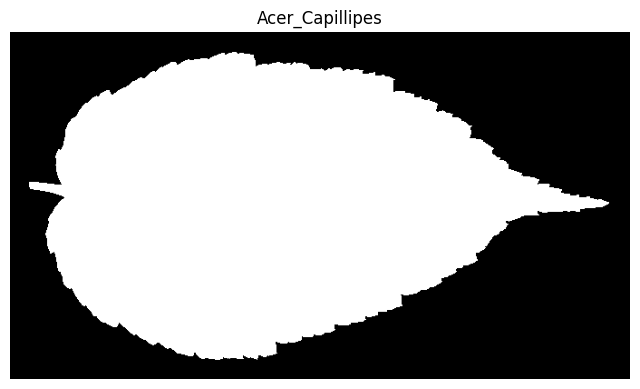

In [10]:
# First we find an example of each species in order to visualize it
species = np.array(sorted(train.species.unique()))
species_examples = [np.random.choice(train[train.species == s].id.values) for s in species]

# Then we gather its index in our list of images in order to find the correct image
indexes = [image_paths.index(path+'images/{}.jpg'.format(i)) for i in species_examples]

# Display the first image
plt.figure(figsize=(8, 8))
image = imread(image_paths[indexes[0]], as_gray=True)
plt.imshow(image, cmap='gray')
plt.title("%s" % (species[0]))
plt.axis('off')
plt.show()

In [11]:
print(len(indexes))

99


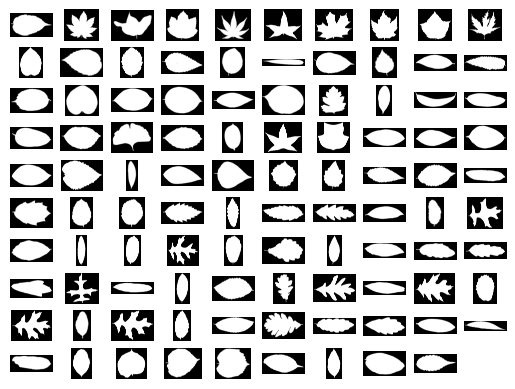

In [12]:
# Now plot 1 image from each category
subplot_args = { 'nrows': 10, 'ncols': 10, 'figsize': (100, 100)}
for i, idx in enumerate(indexes):
    plt.subplot(subplot_args['nrows'], subplot_args['ncols'], i+1)
    image = imread(image_paths[idx], as_gray=True)
    plt.imshow(image, cmap='gray')
    #plt.title("%s" % (species[i])) #`uncomment if you want to see the species name, but it will be messy
    plt.axis('off')
plt.show()

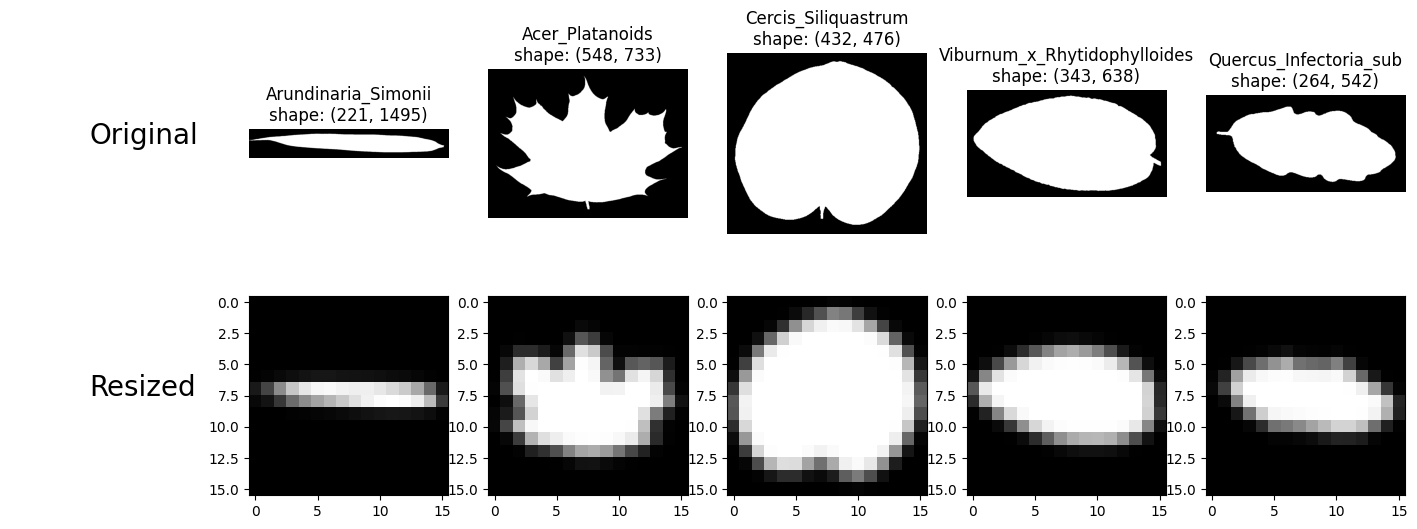

In [13]:
## Image pre-processing
image_size = (16, 16)  # <-- YOUR CODE HERE

# Amount of images
amount = 5
image_sample = np.random.choice(train_images, amount)

# Define figure size
fig = plt.figure(figsize=(18, 6))

# Save original images in the figure
ax = plt.subplot(2, amount + 1, 1)
txt = ax.text(0.4, 0.5, 'Original', fontsize=20)
txt.set_clip_on(False)
plt.axis('off')
for i, impath in enumerate(image_sample):
    plt.subplot(2, amount + 1, i + 2)
    image = imread(impath, as_gray=True)
    plt.imshow(image, cmap='gray')
    _id = int(impath.split('/')[-1].split('.')[0])
    plt.title("{0}\nshape: {1}".format(train[train.id == _id].species.values[0], image.shape))
    plt.axis('off')

# Save resized images in the figure
ax = plt.subplot(2, amount + 1, len(image_sample) + 2)
txt = ax.text(0.4, 0.5, 'Resized', fontsize=20)
txt.set_clip_on(False)
plt.axis('off')
for i, impath in enumerate(image_sample):
    i += len(image_sample) + 3
    plt.subplot(2, amount + 1, i)
    image = imread(impath, as_gray=True)
    image = data_utils.pad2square(image)  # Make the image square
    image = resize(image, output_shape=image_size, mode='reflect', anti_aliasing=True)  # resizes the image
    plt.imshow(image, cmap='gray')

# Show plot
plt.show()

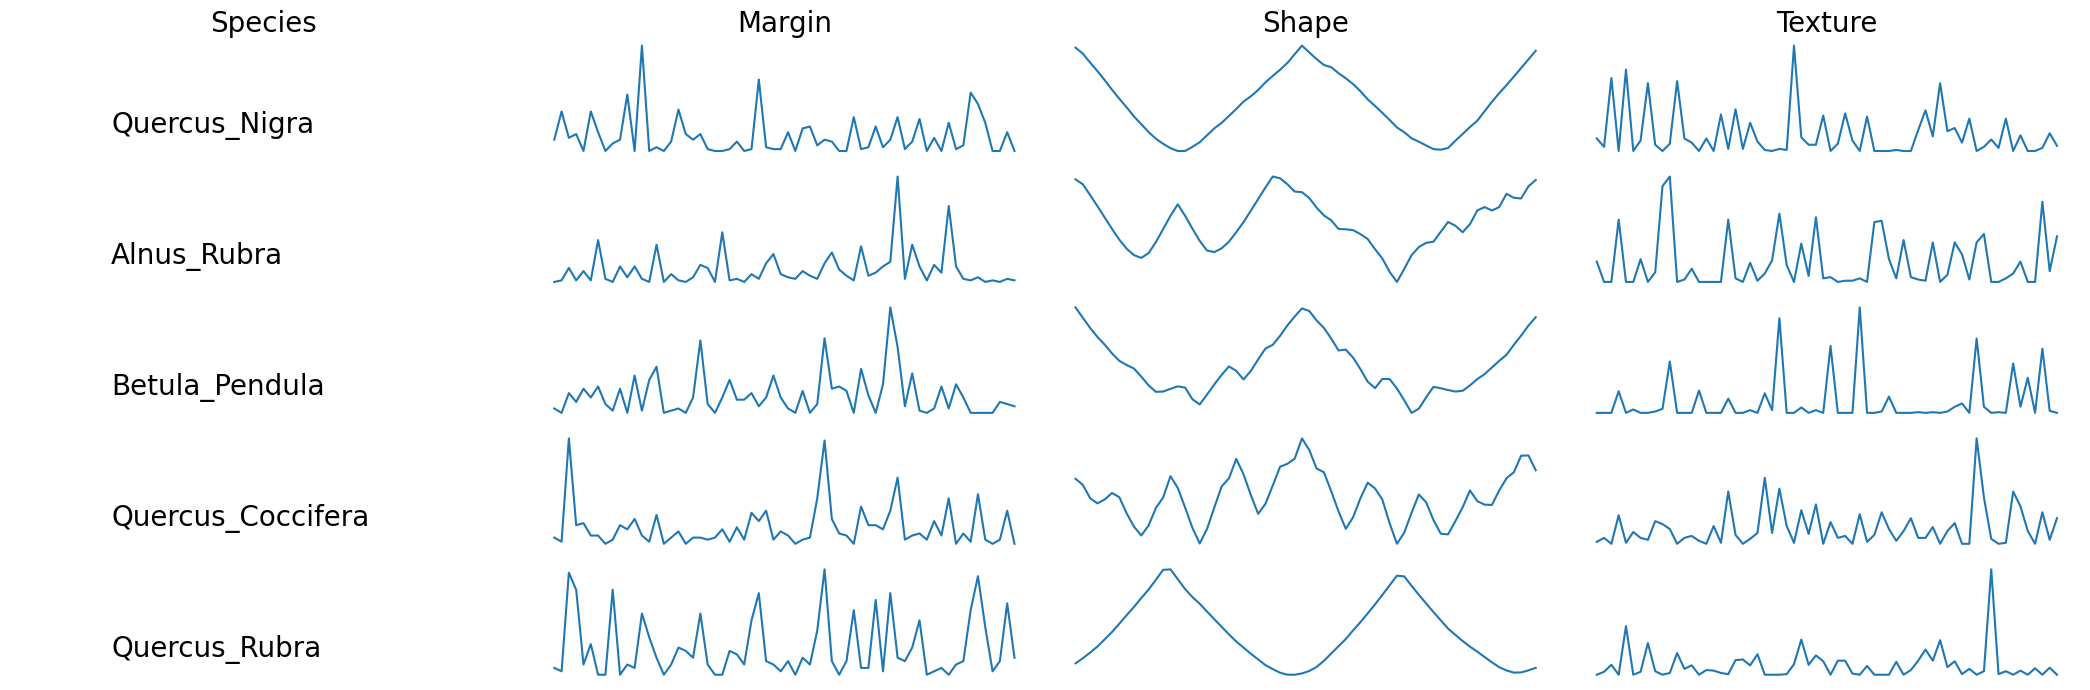

In [14]:
# Extract features
X = train.values
species = X[:, 1:2]
margin = X[:, 2:66]
shape = X[:, 66:130]
texture = X[:, 130:]

# Let us plot some of the features
plt.figure(figsize=(21,7)) # Set the plot size
amount = 5                 # Choose the amount of images we want to show at a time

for i, idx in enumerate(np.random.choice(range(len(train)), amount)):
    ax = plt.subplot(amount,4,1+i*4)
    txt = ax.text(0.2, 0.2, species[idx][0], fontsize=20)
    txt.set_clip_on(False)
    plt.axis('off')
    if i == 0:
        plt.title('Species', fontsize=20)
    plt.subplot(amount,4,2+i*4)
    plt.plot(margin[idx])
    if i == 0:
        plt.title('Margin', fontsize=20)
    plt.axis('off')
    plt.subplot(amount,4,3+i*4)
    plt.plot(shape[idx])
    if i == 0:
        plt.title('Shape', fontsize=20)
    plt.axis('off')
    plt.subplot(amount,4,4+i*4)
    plt.plot(texture[idx])
    if i == 0:
        plt.title('Texture', fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# The image shape should be of the format (height, width, channels)
IMAGE_SHAPE = (16, 16, 1) # we are fine with 1 channel as the image is black and white
NUM_CLASSES = 99
# For all three features types margin, shape, and texture, we have NUM_FEATURES for each type.
NUM_FEATURES = 64

In [16]:
# # # Paths to data
# TRAIN_PATH = path + "train.csv"
# TEST_PATH = path + "test.csv"
# IMAGE_PATHS = glob.glob(path + "images/*.jpg")

# # train holds both X (input) and t (target/truth)
# data = data_utils.load_data(train_path=TRAIN_PATH,
#                             test_path=TEST_PATH,
#                             image_paths=IMAGE_PATHS,
#                             image_shape=IMAGE_SHAPE[:2])
# # to visualize the size of the dimensions of the data
# print("\n@@@Shape checking of data sets@@@")
# print("TRAIN")
# print("\timages\t%s%f" % (data.train['images'].shape, data.train['images'].mean()))
# print("\tmargins\t%s\t%f" % (data.train['margins'].shape, data.train['margins'].mean()))
# print("\tshapes\t%s\t%f" % (data.train['shapes'].shape, data.train['shapes'].mean()))
# print("\ttextures%s\t%f" % (data.train['textures'].shape, data.train['textures'].mean()))
# print("\tts\t %s" % (data.train['ts'].shape))
# print("\twhile training, batch_generator will onehot encode ts to (batch_size, num_classes)")
# print("TEST")
# print("\timages\t%s\t%f" % (data.test['images'].shape, data.test['images'].mean()))
# print("\tmargins\t%s\t%f" % (data.test['margins'].shape, data.test['margins'].mean()))
# print("\tshapes\t%s\t%f" % (data.test['shapes'].shape, data.test['shapes'].mean()))
# print("\ttextures%s\t%f" % (data.test['textures'].shape, data.test['textures'].mean()))
# print("\tids\t%s" % (data.test['ids'].shape))

In [17]:
import pickle

# # Dump the data into a pickle file
# with open(path + '/data.pickle', 'wb') as f:
#     pickle.dump(data, f)

In [18]:
# Load the data from a pickle file
with open(path + '/data.pickle', 'rb') as f:
    data = pickle.load(f)

In [19]:
batch_size = 64
dummy_batch_gen = data_utils.batch_generator(data, batch_size=batch_size, num_classes=NUM_CLASSES, num_iterations=5e3, seed=42)
train_batch = next(dummy_batch_gen.gen_train())
valid_batch, i = next(dummy_batch_gen.gen_valid())
test_batch, i = next(dummy_batch_gen.gen_test())

print("TRAIN")
print("\timages,", train_batch['images'].shape)
print("\tmargins,", train_batch['margins'].shape)
print("\tshapes,", train_batch['shapes'].shape)
print("\ttextures,", train_batch['textures'].shape)
print("\tts,", train_batch['ts'].shape)
print()
print("VALID")
print("\timages,", valid_batch['images'].shape)
print("\tmargins,", valid_batch['margins'].shape)
print("\tshapes,", valid_batch['shapes'].shape)
print("\ttextures,", valid_batch['textures'].shape)
print("\tts,", valid_batch['ts'].shape)
print()
print("TEST")
print("\timages,", test_batch['images'].shape)
print("\tmargins,", test_batch['margins'].shape)
print("\tshapes,", test_batch['shapes'].shape)
print("\ttextures,", test_batch['textures'].shape)
print("\tids,", len(test_batch['ids']))

TRAIN
	images, (64, 16, 16, 1)
	margins, (64, 64)
	shapes, (64, 64)
	textures, (64, 64)
	ts, (64, 99)

VALID
	images, (64, 16, 16, 1)
	margins, (64, 64)
	shapes, (64, 64)
	textures, (64, 64)
	ts, (64, 99)

TEST
	images, (64, 16, 16, 1)
	margins, (64, 64)
	shapes, (64, 64)
	textures, (64, 64)
	ids, 64


# Building the model

In [20]:
# Load functions
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, GRU, Conv2d, Dropout, MaxPool2d, BatchNorm1d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

In [21]:
use_cuda = torch.cuda.is_available()
print("Running GPU.") if use_cuda else print("No GPU available.")


def get_variable(x):
    """ Converts tensors to cuda, if available. """
    if use_cuda:
        return x.cuda()
    return x


def get_numpy(x):
    """ Get numpy array for both cuda and not. """
    if use_cuda:
        return x.cpu().data.numpy()
    return x.data.numpy()

No GPU available.


In [22]:
height, width, channels = IMAGE_SHAPE

conv_out_channels = 64 # <-- Filters in your convolutional layer
kernel_size = 3       # <-- Kernel size
conv_stride = 1       # <-- Stride
conv_pad    = 1      # <-- Padding

# Keep track of features to output layer
features_cat_size = 16640#128+128+64*16*16 # <-- Number of features concatenated before output layer

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_1 = Conv2d(in_channels=channels,
                             out_channels=conv_out_channels,
                             kernel_size=kernel_size,
                             stride=conv_stride,
                             padding=conv_pad)

        self.conv_2 = Conv2d(in_channels=conv_out_channels,
                             out_channels=conv_out_channels*2,
                             kernel_size=kernel_size,
                             stride=conv_stride,
                             padding=conv_pad)

        self.conv_3 = Conv2d(in_channels=conv_out_channels*2,
                             out_channels=conv_out_channels,
                             kernel_size=kernel_size,
                             stride=conv_stride,
                             padding=conv_pad)

        # Exercise: Add a recurrent unit like and RNN or GRU
        # >> YOUR CODE HERE <<
        self.rnn_1 = nn.GRU(input_size=conv_out_channels,
                            hidden_size=128,
                            num_layers=1,
                            batch_first=True)
        # Batch normalization
        self.bn1 = nn.BatchNorm2d(conv_out_channels)
        self.bn2 = nn.BatchNorm2d(conv_out_channels*2)
        self.bn3 = nn.BatchNorm2d(conv_out_channels)

        # Dropout layer with reduced rate
        self.dropout = nn.Dropout(p=0.5)

        self.l_1 = Linear(in_features=features_cat_size,
                          out_features=int(features_cat_size/4),
                          bias=False)

        self.l_out = Linear(in_features=int(features_cat_size/4),
                            out_features=NUM_CLASSES,
                            bias=False)

    def forward(self, x_img, x_margin, x_shape, x_texture):
        features = []
        out = {}

        x_img_1 = self.bn1(self.conv_1(x_img))
        x_img_1 = torch.relu(x_img_1)
        x_img_2 = self.bn2(self.conv_2(x_img_1))
        x_img_2 = torch.relu(x_img_2)
        x_img_3 = self.bn3(self.conv_3(x_img_2))
        x_img_3 = torch.relu(x_img_3)
        features_img = x_img_3.reshape(x_img_3.size(0), -1)
        features_img = self.dropout(features_img)
        features.append(features_img)


        x = torch.cat((x_margin, x_texture), dim=1)
        features_vector = x
        features.append(features_vector)

        x_rnn, _ = self.rnn_1(x_shape.unsqueeze(1))
        x_rnn = x_rnn[:, -1, :]
        features_rnn = x_rnn
        features.append(features_rnn)


        ## Output layer where all features are in use ##
        features_ln = torch.cat(features, dim=1)
        features_final = self.l_1(features_ln)
        out['out'] = self.l_out(features_final)
        return out

net = Net()
if use_cuda:
    net.cuda()
print(net)

Net(
  (conv_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (rnn_1): GRU(64, 128, batch_first=True)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (l_1): Linear(in_features=16640, out_features=4160, bias=False)
  (l_out): Linear(in_features=4160, out_features=99, bias=False)
)


In [23]:
batch_size = 128
dummy_batch_gen = data_utils.batch_generator(data, batch_size=batch_size, num_classes=NUM_CLASSES, num_iterations=5e3, seed=42)
train_batch = next(dummy_batch_gen.gen_train())
valid_batch, i = next(dummy_batch_gen.gen_valid())
test_batch, i = next(dummy_batch_gen.gen_test())

print("TRAIN")
print("\timages,", train_batch['images'].shape)
print("\tmargins,", train_batch['margins'].shape)
print("\tshapes,", train_batch['shapes'].shape)
print("\ttextures,", train_batch['textures'].shape)
print("\tts,", train_batch['ts'].shape)
print()
print("VALID")
print("\timages,", valid_batch['images'].shape)
print("\tmargins,", valid_batch['margins'].shape)
print("\tshapes,", valid_batch['shapes'].shape)
print("\ttextures,", valid_batch['textures'].shape)
print("\tts,", valid_batch['ts'].shape)
print()
print("TEST")
print("\timages,", test_batch['images'].shape)
print("\tmargins,", test_batch['margins'].shape)
print("\tshapes,", test_batch['shapes'].shape)
print("\ttextures,", test_batch['textures'].shape)
print("\tids,", len(test_batch['ids']))

TRAIN
	images, (128, 16, 16, 1)
	margins, (128, 64)
	shapes, (128, 64)
	textures, (128, 64)
	ts, (128, 99)

VALID
	images, (99, 16, 16, 1)
	margins, (99, 64)
	shapes, (99, 64)
	textures, (99, 64)
	ts, (99, 99)

TEST
	images, (128, 16, 16, 1)
	margins, (128, 64)
	shapes, (128, 64)
	textures, (128, 64)
	ids, 128


In [24]:
height, width, channels = IMAGE_SHAPE

conv_out_channels = 64 # <-- Filters in your convolutional layer
kernel_size = 3       # <-- Kernel size
conv_stride = 1       # <-- Stride
conv_pad    = 1      # <-- Padding

# Keep track of features to output layer
features_cat_size = 16640#128+128+64*16*16 # <-- Number of features concatenated before output layer

class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()

        self.conv_1 = Conv2d(in_channels=channels,
                             out_channels=conv_out_channels,
                             kernel_size=kernel_size,
                             stride=conv_stride,
                             padding=conv_pad)

        self.conv_2 = Conv2d(in_channels=conv_out_channels,
                             out_channels=conv_out_channels*2,
                             kernel_size=kernel_size,
                             stride=conv_stride,
                             padding=conv_pad)

        self.conv_3 = Conv2d(in_channels=conv_out_channels*2,
                             out_channels=conv_out_channels,
                             kernel_size=kernel_size,
                             stride=conv_stride,
                             padding=conv_pad)

        # Exercise: Add a recurrent unit like and RNN or GRU
        # >> YOUR CODE HERE <<
        self.rnn_1 = nn.GRU(input_size=conv_out_channels,
                            hidden_size=128,
                            num_layers=1,
                            batch_first=True)
        # Batch normalization
        # self.bn1 = nn.BatchNorm2d(conv_out_channels)
        # self.bn2 = nn.BatchNorm2d(conv_out_channels*2)
        # self.bn3 = nn.BatchNorm2d(conv_out_channels)

        # Dropout layer with reduced rate
        self.dropout = nn.Dropout(p=0.5)

        self.l_1 = Linear(in_features=features_cat_size,
                    out_features=int(features_cat_size/4),
                    bias=False)

        self.l_out = Linear(in_features=int(features_cat_size/4),
                            out_features=NUM_CLASSES,
                            bias=False)

    def forward(self, x_img, x_margin, x_shape, x_texture):
        features = []
        out = {}

        x_img_1 = self.conv_1(x_img)
        x_img_1 = torch.relu(x_img_1)
        x_img_2 = self.conv_2(x_img_1)
        x_img_2 = torch.relu(x_img_2)
        x_img_3 = self.conv_3(x_img_2)
        x_img_3 = torch.relu(x_img_3)
        features_img = x_img_3.reshape(x_img_3.size(0), -1)
        features_img = self.dropout(features_img)
 
        features.append(features_img)

        x = torch.cat((x_margin, x_texture), dim=1)
        features_vector = x
        features.append(features_vector)

        x_rnn, _ = self.rnn_1(x_shape.unsqueeze(1))
        x_rnn = x_rnn[:, -1, :]
        features_rnn = x_rnn
        features.append(features_rnn)


        ## Output layer where all features are in use ##
        features_ln = torch.cat(features, dim=1)
        features_final = self.l_1(features_ln)
        out['out'] = self.l_out(features_final)
        return out

net = ImprovedNet()
if use_cuda:
    net.cuda()
print(net)

ImprovedNet(
  (conv_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (rnn_1): GRU(64, 128, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (l_1): Linear(in_features=16640, out_features=4160, bias=False)
  (l_out): Linear(in_features=4160, out_features=99, bias=False)
)


# Build the cost function

In [25]:
LEARNING_RATE = 0.001
criterion = nn.CrossEntropyLoss() 

# weight_decay is equal to L2 regularization
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE, weight_decay=1e-5) 

def accuracy(ys, ts):
    predictions = torch.max(ys, 1)[1]
    correct_prediction = torch.eq(predictions, ts)
    return torch.mean(correct_prediction.float())

In [26]:
_img_shape = tuple([batch_size] + list(IMAGE_SHAPE))
_feature_shape = (batch_size, NUM_FEATURES)

def randnorm(size):
    return np.random.normal(0, 1, size).astype('float32')

# dummy data
_x_image = get_variable(Variable(torch.from_numpy(randnorm(_img_shape))))
_x_image = _x_image.permute(0, 3, 1, 2)  # Change dimensions to [batch_size, channels, height, width]
_x_margin = get_variable(Variable(torch.from_numpy(randnorm(_feature_shape))))
_x_shape = get_variable(Variable(torch.from_numpy(randnorm(_feature_shape))))
_x_texture = get_variable(Variable(torch.from_numpy(randnorm(_feature_shape))))

# test the forward pass
output = net(x_img=_x_image, x_margin=_x_margin, x_shape=_x_shape, x_texture=_x_texture)
output['out']

tensor([[-0.0621,  0.1381, -0.1462,  ..., -0.0537,  0.0749,  0.0323],
        [ 0.0221,  0.0840, -0.0084,  ...,  0.0552,  0.0223,  0.0440],
        [ 0.0641,  0.0404,  0.0430,  ...,  0.0286, -0.0363, -0.0464],
        ...,
        [ 0.0388,  0.0692,  0.0042,  ..., -0.0646,  0.1010,  0.0088],
        [ 0.0628,  0.0795, -0.0407,  ...,  0.0348, -0.0347,  0.0117],
        [-0.0172,  0.0204,  0.0184,  ..., -0.0334, -0.0256, -0.0099]],
       grad_fn=<MmBackward0>)

# Train

Valid, it: 1000 loss: 0.69 accs: 0.89



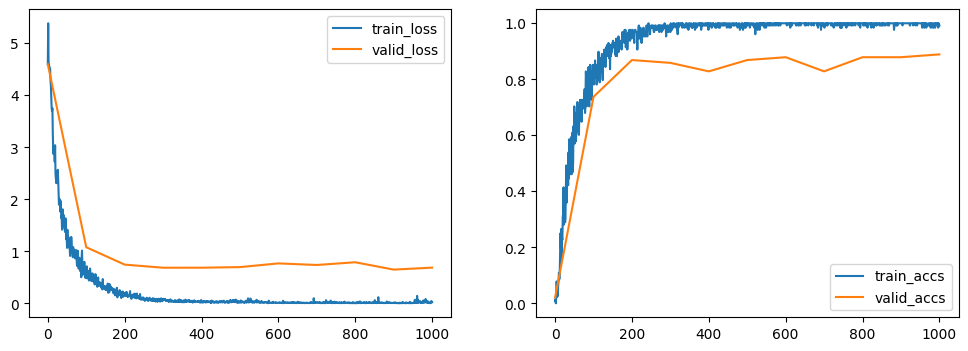

In [27]:
# Setup settings for training
VALIDATION_SIZE = 0.1 # 0.1 is ~ 100 samples for validation
max_iter = 1000
log_every = 100
eval_every = 100

# Function to get label
def get_labels(batch):
    return get_variable(Variable(torch.from_numpy(batch['ts']).long()))

# Function to get input
def get_input(batch):
    return {
        'x_img': get_variable(Variable(torch.from_numpy(batch['images']))).permute(0, 3, 1, 2),
        'x_margin': get_variable(Variable(torch.from_numpy(batch['margins']))),
        'x_shape': get_variable(Variable(torch.from_numpy(batch['shapes']))),
        'x_texture': get_variable(Variable(torch.from_numpy(batch['textures'])))
    }

# Initialize lists for training and validation
train_iter = []
train_loss, train_accs = [], []
valid_iter = []
valid_loss, valid_accs = [], []

# Generate batches
batch_gen = data_utils.batch_generator(data,
                                       batch_size=batch_size,
                                       num_classes=NUM_CLASSES,
                                       num_iterations=max_iter,
                                       seed=42,
                                       val_size=VALIDATION_SIZE)

# Train network
net.train()
for i, batch_train in enumerate(batch_gen.gen_train()):
    if i % eval_every == 0:
        net.eval()
        val_losses, val_accs, val_lengths = 0, 0, 0
        for batch_valid, num in batch_gen.gen_valid():
            input_data = get_input(batch_valid)
            output = net(**input_data)
            labels_argmax = torch.max(get_labels(batch_valid), 1)[1]
            val_losses += criterion(output['out'], labels_argmax) * num
            val_accs += accuracy(output['out'], labels_argmax) * num
            val_lengths += num

        # Divide by the total accumulated batch sizes
        val_losses /= val_lengths
        val_accs /= val_lengths
        valid_loss.append(get_numpy(val_losses))
        valid_accs.append(get_numpy(val_accs))
        valid_iter.append(i)
        print("Valid, it: {} loss: {:.2f} accs: {:.2f}\n".format(i, valid_loss[-1], valid_accs[-1]))
        net.train()

    # Train network
    input_data = get_input(batch_train)  # Ensure input_data is defined
    output = net(**input_data)
    labels_argmax = torch.max(get_labels(batch_train), 1)[1]
    batch_loss = criterion(output['out'], labels_argmax)

    train_iter.append(i)
    train_loss.append(float(get_numpy(batch_loss)))
    train_accs.append(float(get_numpy(accuracy(output['out'], labels_argmax))))

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()

    # Log i figure
    if i % log_every == 0:
        fig = plt.figure(figsize=(12,4))
        plt.subplot(1, 2, 1)
        plt.plot(train_iter, train_loss, label='train_loss')
        plt.plot(valid_iter, valid_loss, label='valid_loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(train_iter, train_accs, label='train_accs')
        plt.plot(valid_iter, valid_accs, label='valid_accs')
        plt.legend()
        plt.show()
        clear_output(wait=True)
        # print("Train, it: {} loss: {:.2f} accs: {:.2f}".format(i, train_loss[-1], train_accs[-1]))

    if max_iter < i:
        break

Final Architecture:
I started off with 1 convolutional, 1 GRU and 1 linear output layer, and got a validation accuracy of 0.75.
I added 2 more convolutional layers and a linear layer first, that improved validation accuracy, but made a model much slower running on my computer. This was caused due to the fact that the network became deeper, and learned more patterns. I could improve the original accuracy from 0.75 to 0.78. In order to reduce training accuracy and make validation better (tackle overfitting), I implemented batch normalization and 0.5 dropout rate with a weight decay in the optimizer. However, these steps just made the validation accuracy much worse while not reducing training accuracy.

Training Parameters:
I doubled the batch size and improved the learning rate to 0.0001 to get better results.

Final Results:
Removing batch normalization and doubling the batch size resulted in a huge increase in accuracy. I finally could reach 0.89 accuracy score with the new model. However this meant only a 0.7 Kaggle score.

In [28]:
# GET PREDICTIONS
# containers to collect ids and predictions
ids_test, preds_test = [], []
net.eval()
# run like with validation
for batch_test, num in batch_gen.gen_test():
    output = net(**get_input(batch_test))
    norm_output = F.softmax(output['out'], dim=1)
    y_out = norm_output.data

    ids_test += batch_test['ids']
    if num!=len(y_out):
        # in case of the last batch, num will be less than batch_size
        y_out = y_out[:num]
    preds_test.append(y_out)
preds_test = np.concatenate(preds_test, axis=0)
assert len(ids_test) == len(preds_test)

## Make submission file

In [29]:
preds_df = pd.DataFrame(preds_test, columns=data.le.classes_)
ids_test_df = pd.DataFrame(ids_test, columns=["id"])
submission = pd.concat([ids_test_df, preds_df], axis=1)
submission.to_csv(path + 'submission.csv', index=False)
submission.head()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,2.662877e-07,4.464374e-07,2.837100e-11,5.837644e-06,3.915089e-08,3.415028e-12,1.321205e-11,1.732606e-06,1.118819e-05,...,5.479485e-10,2.059886e-08,5.655487e-08,2.025241e-08,5.549441e-09,2.792528e-08,3.047211e-10,1.700388e-04,8.689918e-11,2.332727e-09
1,7,1.154339e-08,1.489433e-08,2.723494e-07,7.762144e-07,1.046604e-09,4.634973e-08,2.455140e-08,1.479805e-06,1.073328e-06,...,3.040606e-11,9.822597e-07,2.978735e-09,2.930737e-07,7.154820e-07,3.074897e-07,3.385104e-07,2.586462e-07,1.401877e-08,2.995804e-06
2,9,5.379266e-08,9.829615e-01,1.592682e-08,6.759968e-04,2.748698e-04,8.490825e-08,1.351658e-02,3.593516e-05,1.102404e-05,...,3.020580e-09,2.755620e-09,5.841586e-09,8.132507e-05,1.641763e-07,2.847434e-05,1.739348e-08,1.285742e-06,9.713617e-08,2.029453e-10
3,12,5.461512e-14,2.943535e-10,5.012743e-09,8.004800e-08,2.627085e-12,5.481000e-12,4.343442e-09,2.634924e-08,5.518881e-08,...,9.726508e-14,7.718253e-08,8.470447e-11,1.169418e-10,1.548591e-14,5.526697e-12,3.383896e-12,1.538272e-12,3.439435e-08,4.724920e-15
4,13,3.897069e-09,3.408822e-04,5.745398e-12,2.455571e-07,1.669079e-07,2.700754e-10,6.656204e-08,1.765383e-10,8.418128e-09,...,4.645233e-10,1.774122e-14,1.929990e-03,2.428702e-05,5.993459e-03,1.113807e-04,1.177868e-07,8.891419e-12,7.086864e-10,5.769987e-12
